In [8]:
import os
import pandas as pd
from iexfinance.stocks import Stock
from datetime import datetime
import matplotlib.pyplot as plt
import iexfinance as iex
from dotenv import load_dotenv

SYMBOL = 'AAPL'
START_DATE = datetime(2020, 1, 1)
END_DATE = datetime.now()


In [9]:
print('Loading private tokens... (check .env.example for full configuration list)')
load_dotenv()

IEX_TOKEN = os.environ.get('IEX_TOKEN','\n====== INSERT A VALID IEX API TOKEN BEFORE CONTINUING ========\n\nYou can get a free token at https://iexcloud.io/s/6b797c57\n\n')

Loading private tokens... (check .env.example for full configuration list)


In [10]:
os.environ.IEX_TOKEN=IEX_TOKEN
print('IEX_API_VERSION:', os.environ.get('IEX_API_VERSION'))
print('IEX_OUTPUT_FORMAT:', os.environ.get('IEX_OUTPUT_FORMAT'))
print()
print('SYMBOL:', SYMBOL)
print('START_DATE:', START_DATE)
print('END_DATE:', END_DATE)

IEX_API_VERSION: iexcloud-sandbox
IEX_OUTPUT_FORMAT: pandas

SYMBOL: AAPL
START_DATE: 2020-01-01 00:00:00
END_DATE: 2020-03-19 14:45:02.843394


Get stock prices

In [12]:
prices = iex.stocks.get_historical_data(SYMBOL, START_DATE, END_DATE)
prices.head()

,open,high,low,close,volume
date,,,,,
2020-01-02,299.15,315.00,307.89,311.79,34302375
2020-01-03,309.71,314.05,306.80,309.50,38063342
2020-01-06,294.90,308.03,295.56,300.30,30023732
2020-01-07,306.52,308.30,310.46,308.67,28778397
2020-01-08,310.40,308.57,304.49,316.16,34217167
2020-01-09,313.34,318.85,319.20,324.05,43570381
2020-01-10,312.20,318.19,308.30,323.05,35948661
2020-01-13,322.61,318.51,312.83,332.12,31061655
2020-01-14,319.20,331.50,325.84,323.46,41519895


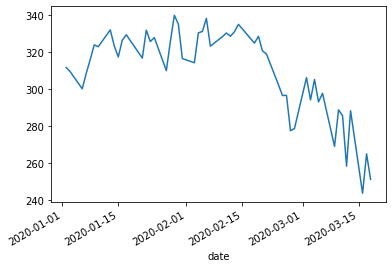

In [17]:
prices['close'].plot(label="Close")

Get options expiration dates

In [13]:
expirations = iex.stocks.get_eod_options(SYMBOL)
expirations



,0
0,207125
1,211586
2,204262
3,203414
4,204058
5,203756
6,207175
7,203297
8,203009
9,204654


Get option for first expiration date.

(only available for paid accounts on IEX Cloud)

In [6]:
first_expiration = iex.stocks.get_eod_options(SYMBOL, expirations[0][0])
first_expiration

IEXQueryError: An error occurred while making the query.